In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

def psi (base_segments, comparison_segments):
    return (base_segments - comparison_segments)*np.log(base_segments / comparison_segments)

def psi_index(data, index, variable):
    base = data[index].groupby([variable]).count()['Default'].reset_index().rename(columns={variable:'VarValue', 'Default':'count'})
    base['perc_base'] = base['count']/sum( base['count'])
    base.drop('count', axis=1, inplace=True)
    comparison = data[~index].groupby([variable]).count()['Default'].reset_index().rename(columns={variable:'VarValue', 'Default':'count'})
    comparison['perc_current'] =comparison['count']/sum( comparison['count'])
    comparison.drop('count', axis=1, inplace=True)
    df = pd.merge(base,comparison, on='VarValue')
    df['psi'] = psi(df['perc_base'],df['perc_current'] )
    df['variable'] = variable
    return df

In [2]:
data=pd.read_csv('./germancredit.csv')
data['binned_age']=data['age']/10
data['binned_age']=data['binned_age'].astype(int)*10
data.columns

Index(['Default', 'checkingstatus1', 'duration', 'history', 'purpose',
       'amount', 'savings', 'employ', 'installment', 'status', 'others',
       'residence', 'property', 'age', 'otherplans', 'housing', 'cards', 'job',
       'liable', 'tele', 'foreign', 'binned_age'],
      dtype='object')

In [3]:
index = np.random.rand(len(data)) < 0.8
variable='binned_age'
age = psi_index(data, index, variable)


variable='purpose'
purpose = psi_index(data, index, variable)

variable='status'
status= psi_index(data, index, variable)

all_vars =pd.concat([age, purpose, status ])
all_vars

VarValue  perc_base  perc_current       psi    variable
0       20   0.371605      0.357895  0.000515  binned_age
1       30   0.330864      0.326316  0.000063  binned_age
2       40   0.171605      0.184211  0.000894  binned_age
3       50   0.075309      0.068421  0.000661  binned_age
4       60   0.041975      0.052632  0.002411  binned_age
5       70   0.006173      0.010526  0.002324  binned_age
0      A40   0.240741      0.205263  0.005656     purpose
1      A41   0.103704      0.100000  0.000135     purpose
2     A410   0.007407      0.031579  0.035049     purpose
3      A42   0.172840      0.215789  0.009532     purpose
4      A43   0.288889      0.242105  0.008265     purpose
5      A44   0.009877      0.021053  0.008459     purpose
6      A45   0.018519      0.036842  0.012604     purpose
7      A46   0.054321      0.031579  0.012336     purpose
8      A48   0.009877      0.005263  0.002904     purpose
9      A49   0.093827      0.110526  0.002735     purpose
0      A91   0.049383      0.052632  0.000207      status
1      A92   0.330864      0.221053  0.044288      status
2      A93   0.528395      0.631579  0.018406      status
3      A94   0.091358      0.094737  0.000123      status

Согласно Наиму Саддики **PSI(Population Stability Index)**:
* индекс **меньше 0.10** показывает отсутствие значимого изменения популяции,
* индекс **0.10–0.25** говорит о незначительном изменении, которое необходимо исследовать, 
* индекс **выше 0.25** свидетельствует о значительном смещении популяции заявителей.

При наличии данных, необходимо добавить переменную которая будет отображать дату или временной промежуток чтобы отслеживать изминения популяции на протяжении времени

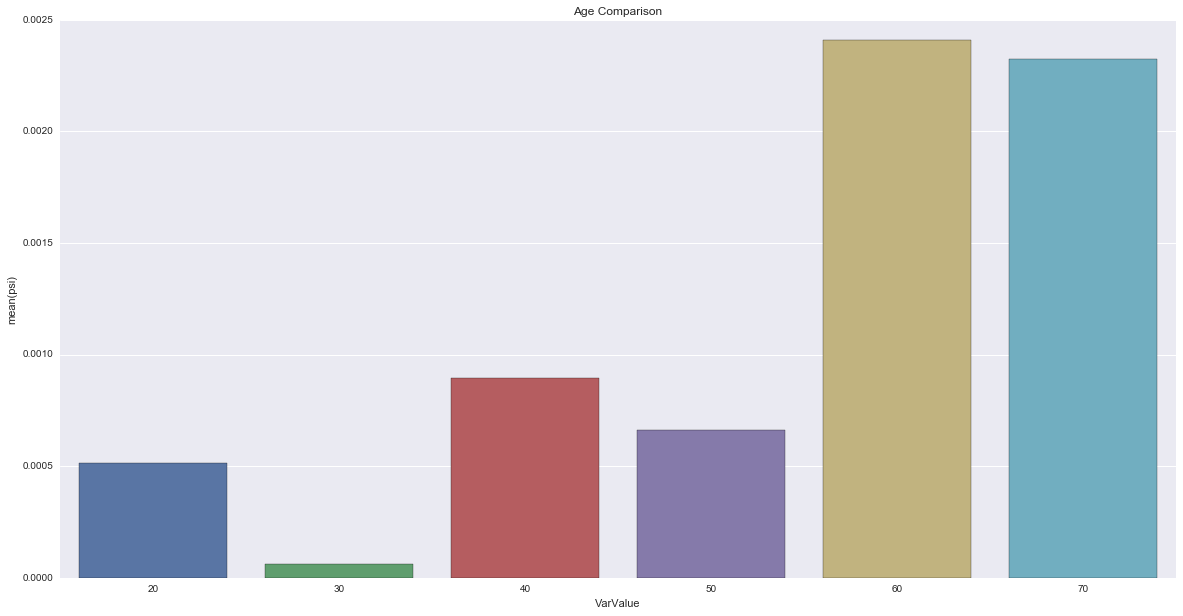

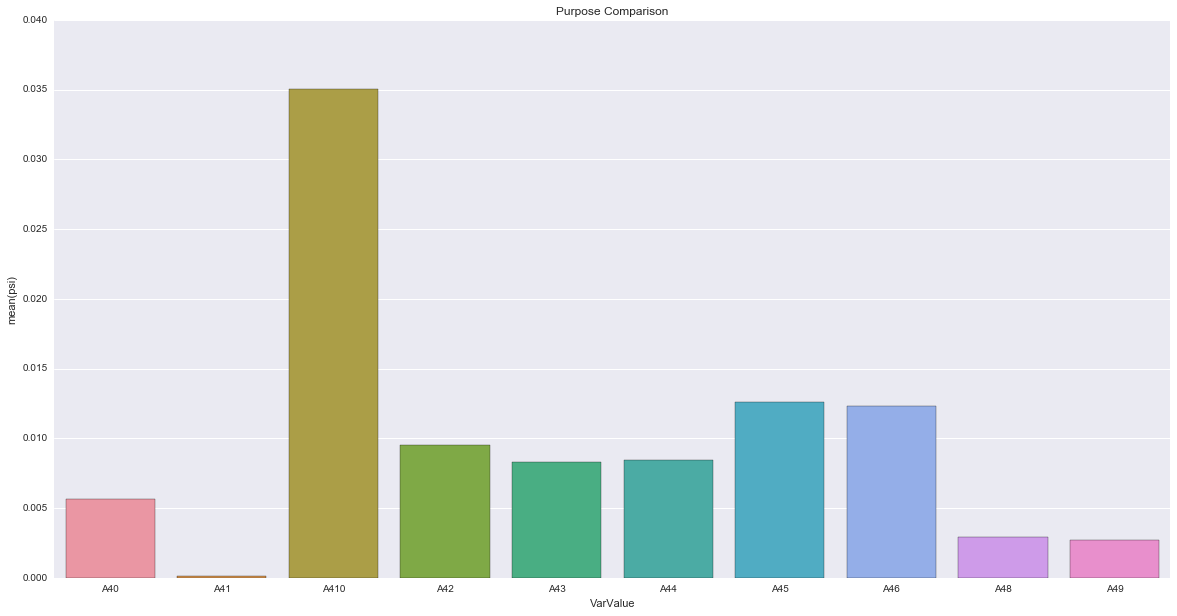

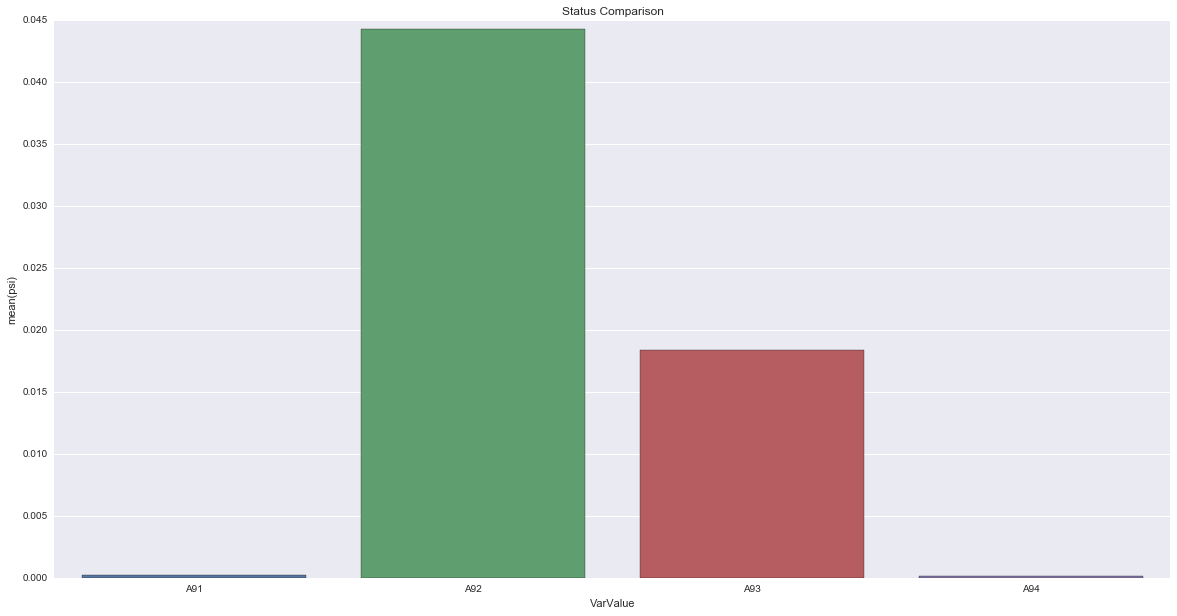

In [4]:
plt.figure(figsize=(20,10));
sns.barplot(x='VarValue',y='psi', data =age);
sns.plt.title('Age Comparison');

plt.figure(figsize=(20,10));
sns.barplot(x='VarValue',y='psi', data =purpose);
sns.plt.title('Purpose Comparison');

plt.figure(figsize=(20,10));
sns.barplot(x='VarValue',y='psi', data =status);
sns.plt.title('Status Comparison');
